# Mecánica Celeste
## 2022-I
## Set de Problemas No 4: Formalismos Lagrangiano y Hamiltoniano

In [ ]:
#@markdown Librerías

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**1. Tiempo en función de la posición angular.** Usando el formalismo lagrangiano para estudiar el problema de los 2 cuerpos, demuestre que la ecuación geométrica de la órbita relativa se escribe como

 \begin{equation}
    r = \frac{l^2/m_r^2 \mu}{1 + e \cos\theta}
 \end{equation}

 con $e = \sqrt{1 + 2l^2 E / m_r^3 \mu^2}$. Teniendo en cuenta la ecuación que define el momento angular total del sistema $l = m_r r^2\dot{\theta}$ deduzca la siguiente relación integral entre el tiempo y la variable angular

 \begin{equation}
     t - t_p = \frac{l^3}{m_r^3 \mu^2} \int_{0}^{\theta}\frac{d\theta'}{(1 + e\cos\theta')^2}
 \end{equation}

 el ángulo $\theta$ se mide desde el periapsis. Suponiendo una órbita parabólica integre la expresión anterior y muestre que

 \begin{equation}
     t - t_p = \frac{l^3}{m_r^3 \mu^2} \left(\tan\frac{\theta}{2} + \frac{1}{3}\tan^3\frac{\theta}{2}\right)
 \end{equation}

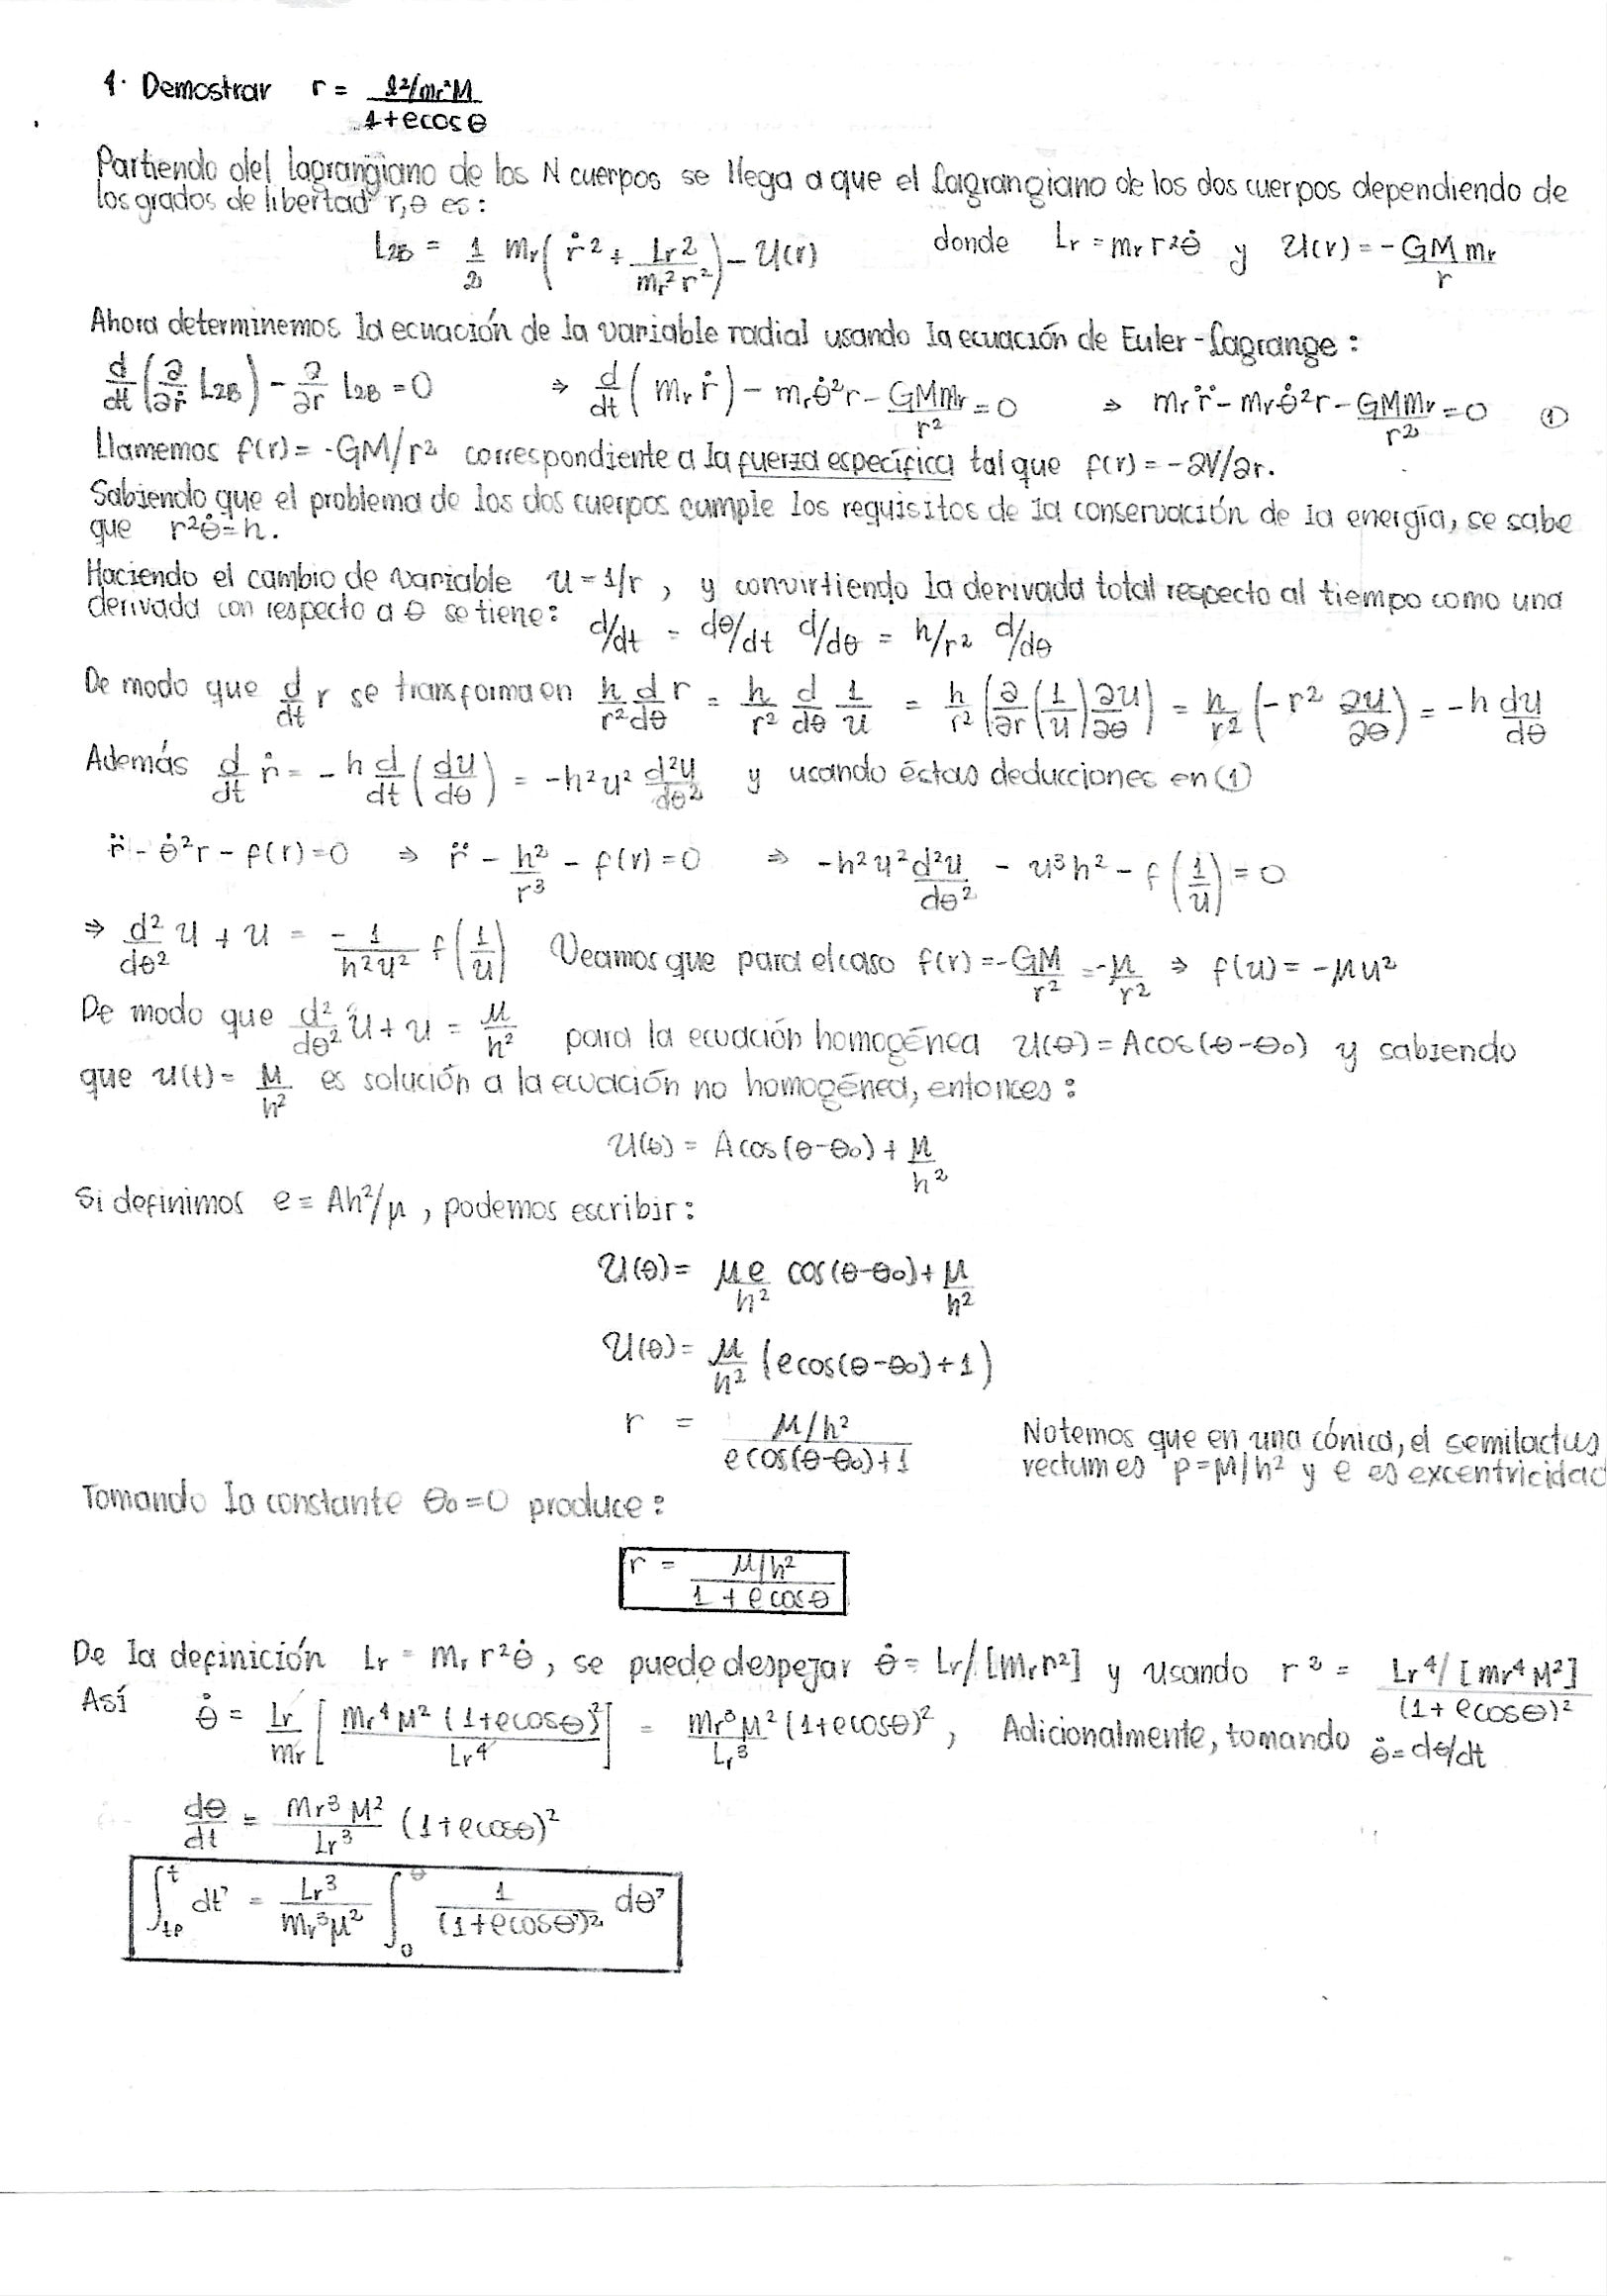


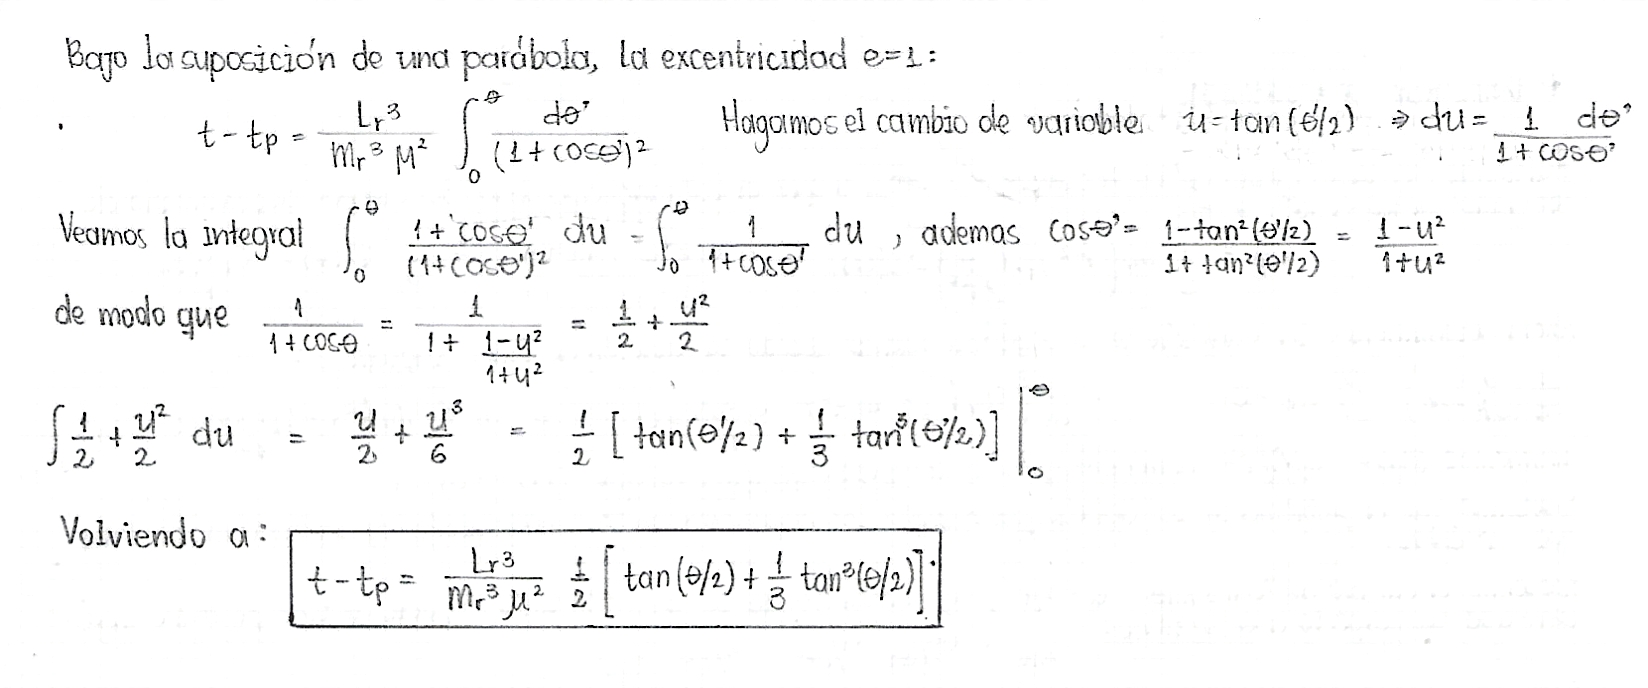

**2. Invarianza en el caso electromagnético.** De los resultados básicos de la teoría electromagnética se sabe que una partícula de masa $m$ moviéndose con velocidad $\vec{v}$ respecto a un campo electromagnético,  puede describirse mediante el siguiente lagrangiano

\begin{equation}
\displaystyle L = \frac{1}{2}mv^2 - q\phi + q \vec{A}\cdot \vec{v}
\end{equation}
  
  donde los campos eléctrico $\vec{E}$ y magnético $\vec{B}$ pueden derivarse a partir de los campos $\phi$ (el potencial escalar) y $\vec{A}$ (el potencial vectorial) como
  
\begin{equation}
  \displaystyle \vec{E} = -\nabla \phi - \frac{\partial \vec{A}}{\partial t}
\end{equation}

\begin{equation}
  \displaystyle \vec{B} = 	\nabla \times \vec{A}
\end{equation}
  
**a.** Encuentre las ecuaciones de Euler-Lagrange para la partícula. Hágalo para una sola coordenada generalizada ($x$ por ejemplo) y generalice el resultado a tres dimensiones. Evidentemente, deberá obtener las ecuaciones de Lorentz.

**b.** Ahora, si $L$ es un Lagrangiano de un sistema con $n$ grados de libertad que cumple con las ecuaciones de Lagrange, muestre que:

\begin{equation}
L' = L + \frac{dF(q_1,q_2,...,q_n,t)}{dt}
\end{equation}

también satisface las ecuaciones de Lagrange, donde F es es una función arbitraria, pero diferenciable.

**C.** Con base en el anterior resultado, estudie la invarianza del campo electromágnético bajo una transformación gauge de los potenciales escalar y vectorial, dada por:


<center>$A \to A + \nabla \psi(r,t)$</center>
    
<center>$\phi \to \phi - \frac{1}{c} \frac{\partial \psi}{\partial t}$</center>

donde $\psi$ es arbitraria (pero diferenciable). ¿Qué efecto tiene esta transformación gauge en el Lagrangiano de una partícula en movimiento en un campo electromagnético? ¿Se ve afectado el movimiento?

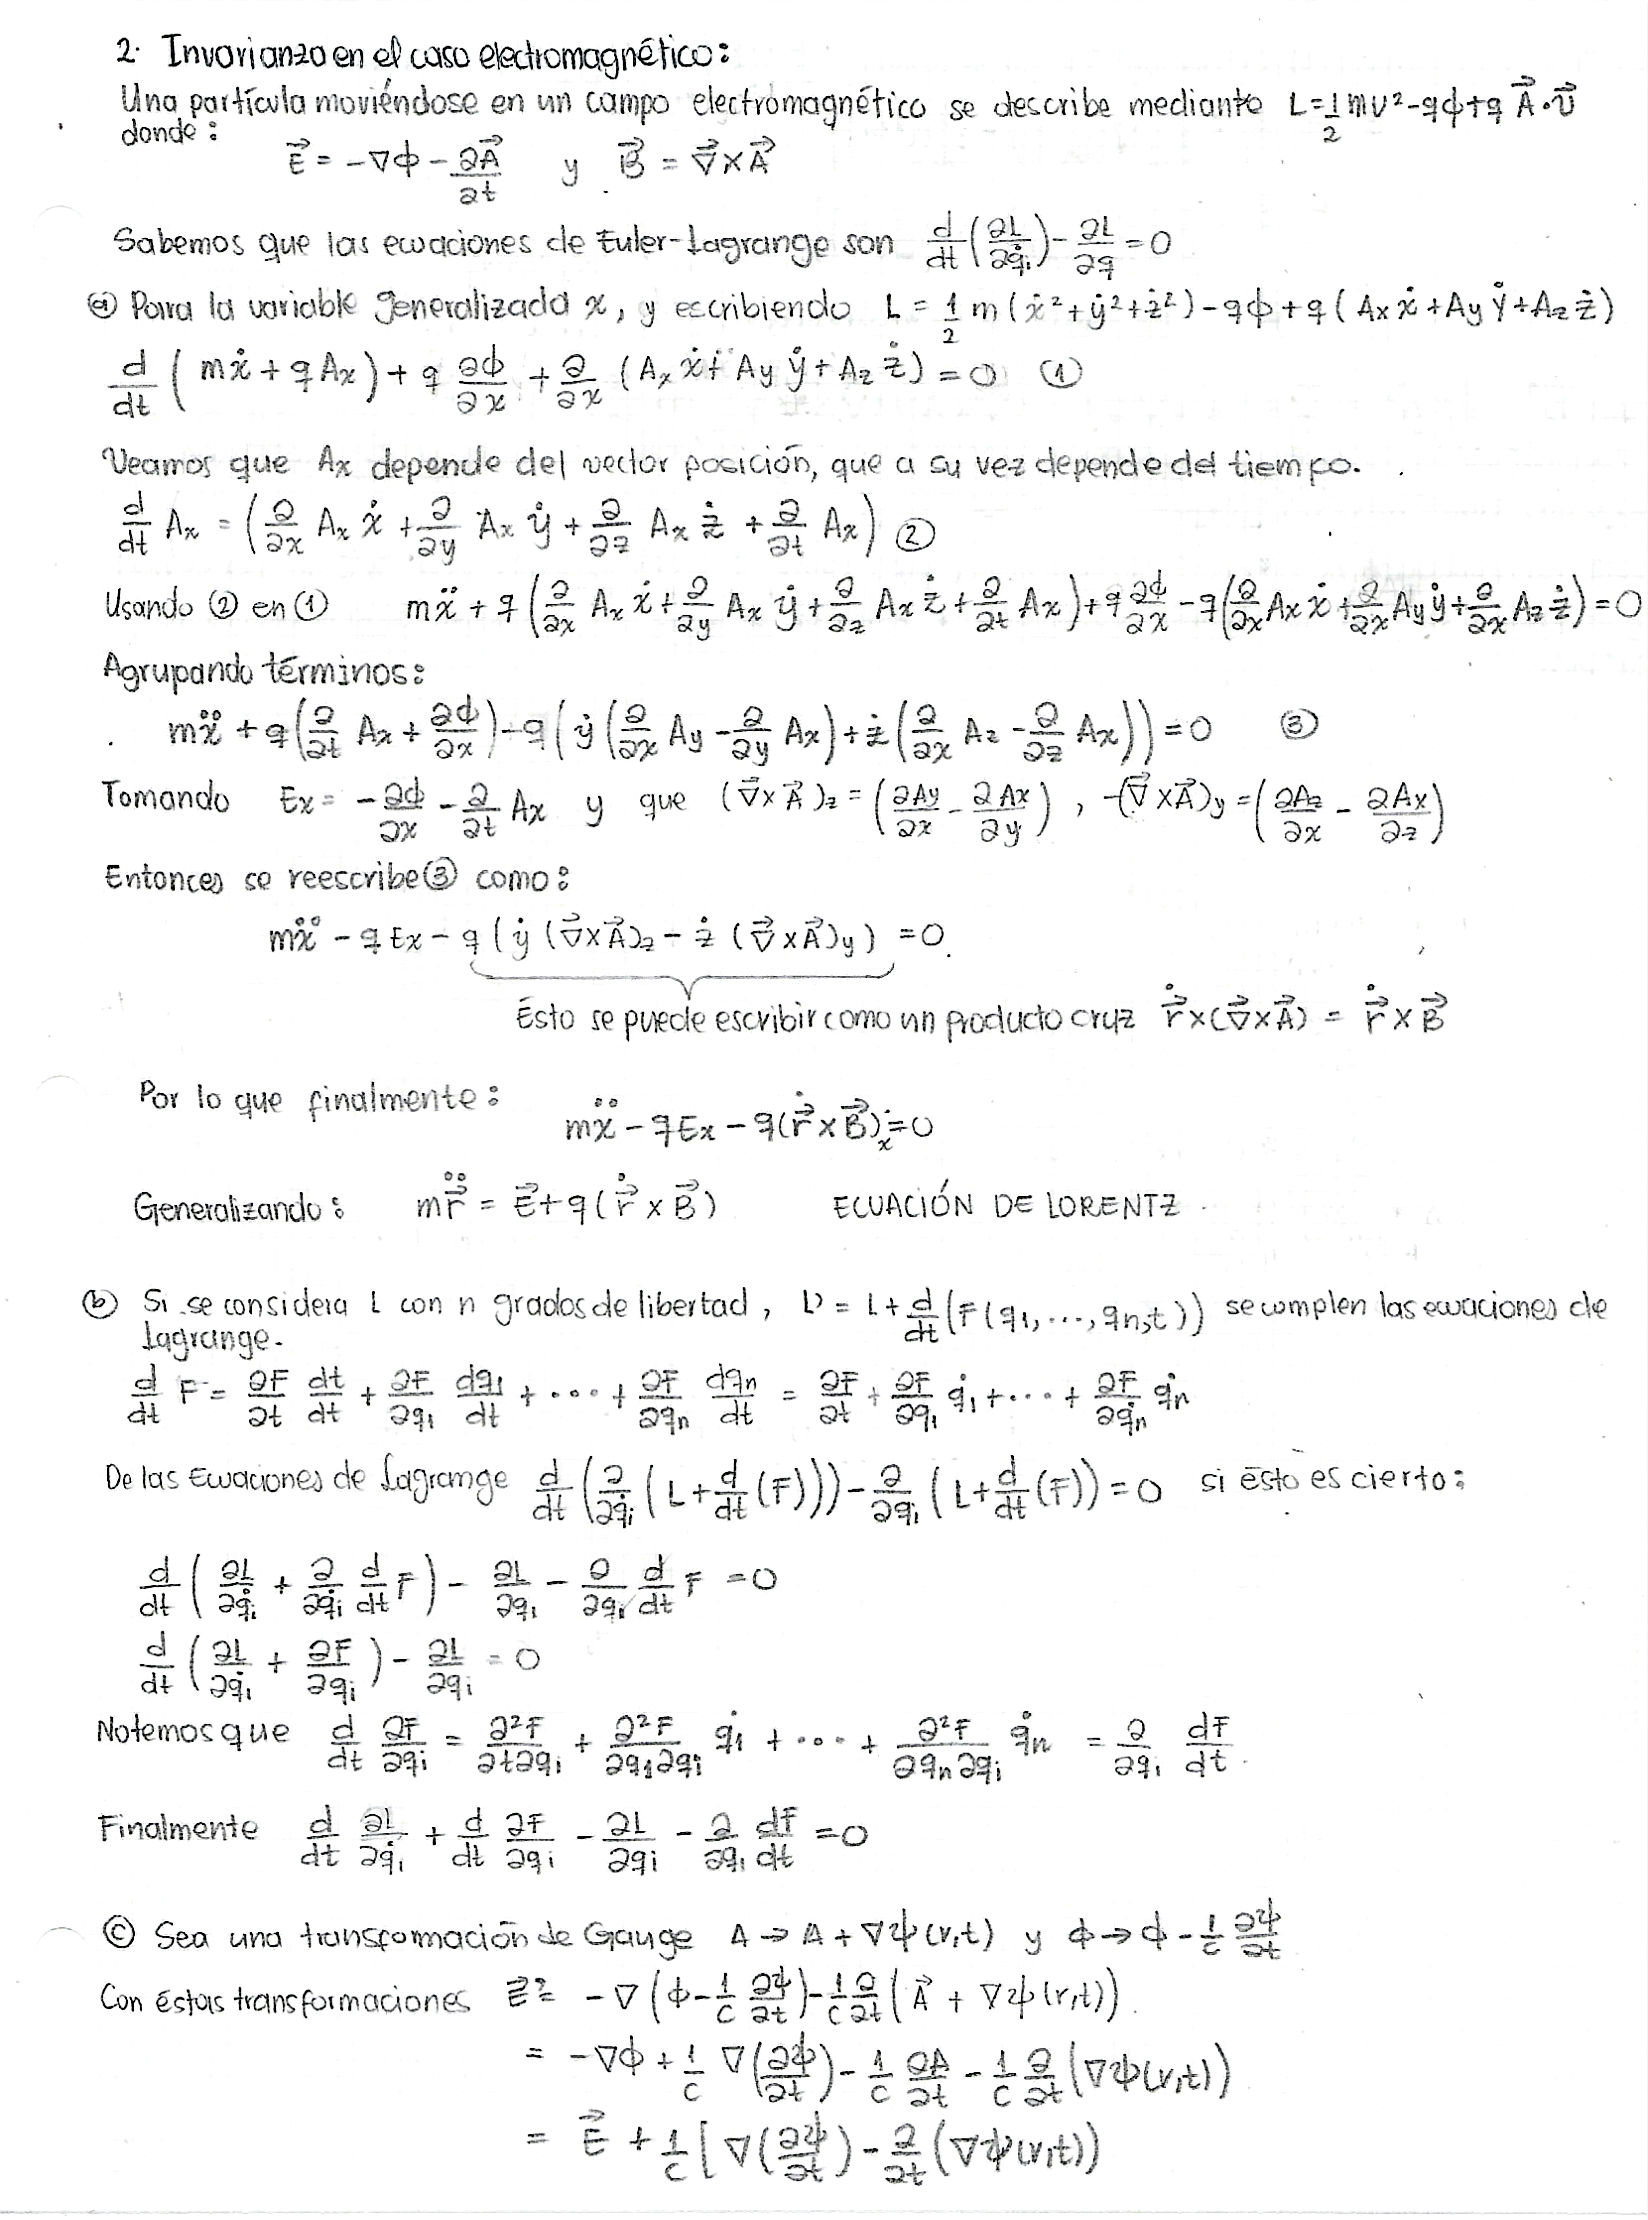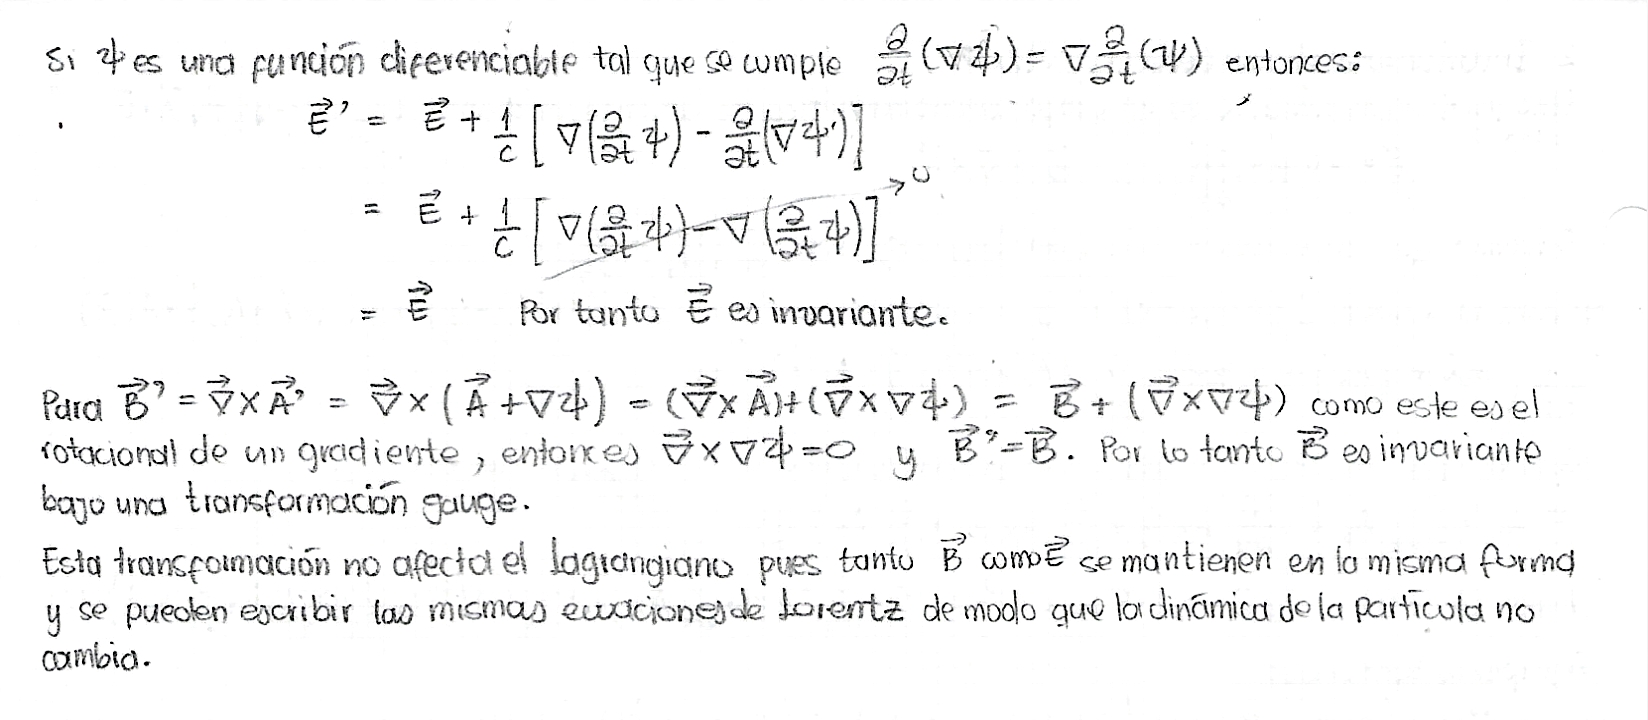

**3. Péndulo en soporte rotante.** Un péndulo de longitud $l$ y masa $m$ se encuentra fijado a un soporte de masa despreciable que gira en un circulo de radio $a$ en un plano vertical, con velocidad angular constante $\omega$. Encuentre las ecuaciones de movimiento del sistema, utilizando el formalismo Lagrangiano. Solucione numéricamente y grafique (simule) el movimiento del péndulo.



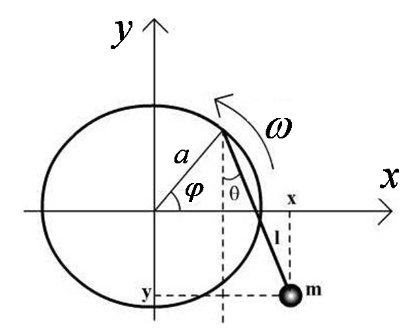

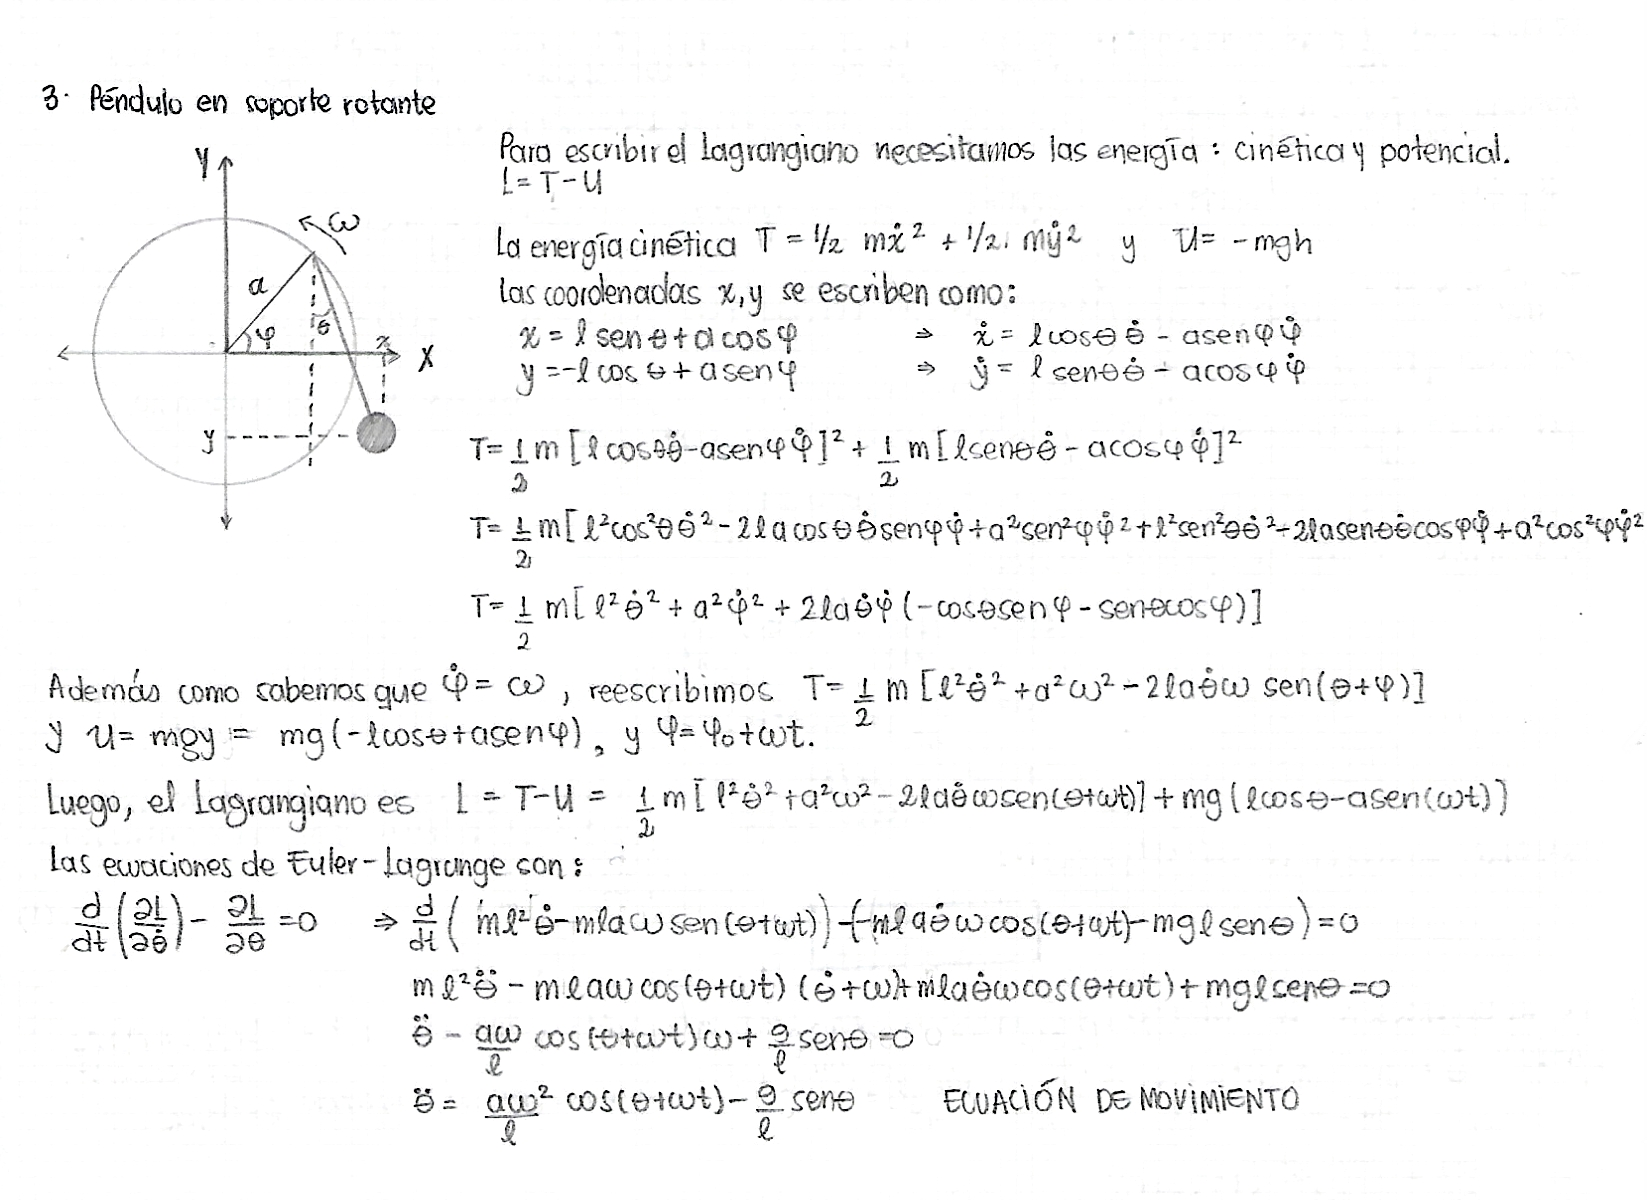

In [ ]:
#@markdown  EDO péndulo rotante
g=9.81

def edm_pendulorotante(Y,t):

  #variables
  theta=Y[0]
  thetaprima=Y[1]

  #derivadas
  dthetaprima=a*om**2/l*np.cos(theta-om*t)-g/l*np.sin(theta)

  return [thetaprima,dthetaprima]

In [ ]:
#@markdown  Solución EDO
a=1            #Radio circulo
l=2            #longitud péndulo
om=0.5         #Velocidad giro del círculo

#Periodo de oscilación
T=2*np.pi*np.sqrt(l/g)

#Condiciones iniciales
Y=[np.radians(45),0.0]    #inicia a 45° y en ese punto tiene velocidad nula
ts=np.linspace(0,3*T,100)

#Solución numérica
solucion=odeint(edm_pendulorotante,Y,ts)

In [ ]:
#@markdown  Coordenadas cartesianas
#Extraemos y convertimos los ángulos al intervalo [-pi,pi]

thetas=np.mod(solucion[:,0],2*np.pi)
thetas[thetas>np.pi]=thetas[thetas>np.pi]-2*np.pi

#Extraemos la vlocidad angular
thetaprima=solucion[:,1]

#En el espacio coordenado
x=l*np.sin(thetas)+a*np.cos(om*ts)
y=-l*np.cos(thetas)+a*np.sin(om*ts)

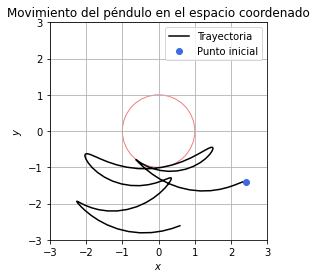

In [ ]:
#@markdown Gráfica
figure, axes = plt.subplots()
draw_circle = plt.Circle((0,0), a,fill=False,color="lightcoral")

axes.plot(x,y,color="black",label="Trayectoria")
axes.plot(x[0],y[0],"o", color="royalblue", label="Punto inicial")
axes.set_aspect(1)
axes.add_artist(draw_circle)

axes.set_xlim((-1.5*l,1.5*l))
axes.set_ylim((-1.5*l,1.5*l))

axes.set_xlabel(r"$x$")
axes.set_ylabel(r"$y$")
axes.set_title("Movimiento del péndulo en el espacio coordenado")
plt.legend()
plt.grid()


**4. Péndulo doble I.** El péndulo doble, como se muestra en la figura, está formado por dos péndulos simples de longitudes $l_1$ y $l_2$, de los que cuelgan partículas de masas $m_1$ y $m_2$.  En un instante determinado $t$, los hilos inextensibles forman ángulos $θ_1$ y $θ_2$ con la vertical.

**a.** Encuentre las ecuaciones de movimiento utilizando el formalismo lagrangiano.

**b.** Solucione numéricamente las ecuaciones del péndulo doble y grafique su movimiento en el espacio de configuración. Luego, estudie el caos en éste sistema, es decir, grafique simultáneamente dos pendulos dobles que arranquen de condiciones iniciales muy cercanas, de modo que se vea que divergen con el tiempo (Ejemplo: https://images.app.goo.gl/TyiUFQb6DaMpKSvAA).

**Reto [opcional].** Realice el mismo procedimiento para el caso de 3 péndulos y luego generalice para $n$ péndulos.

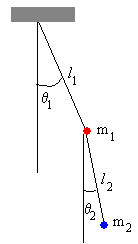

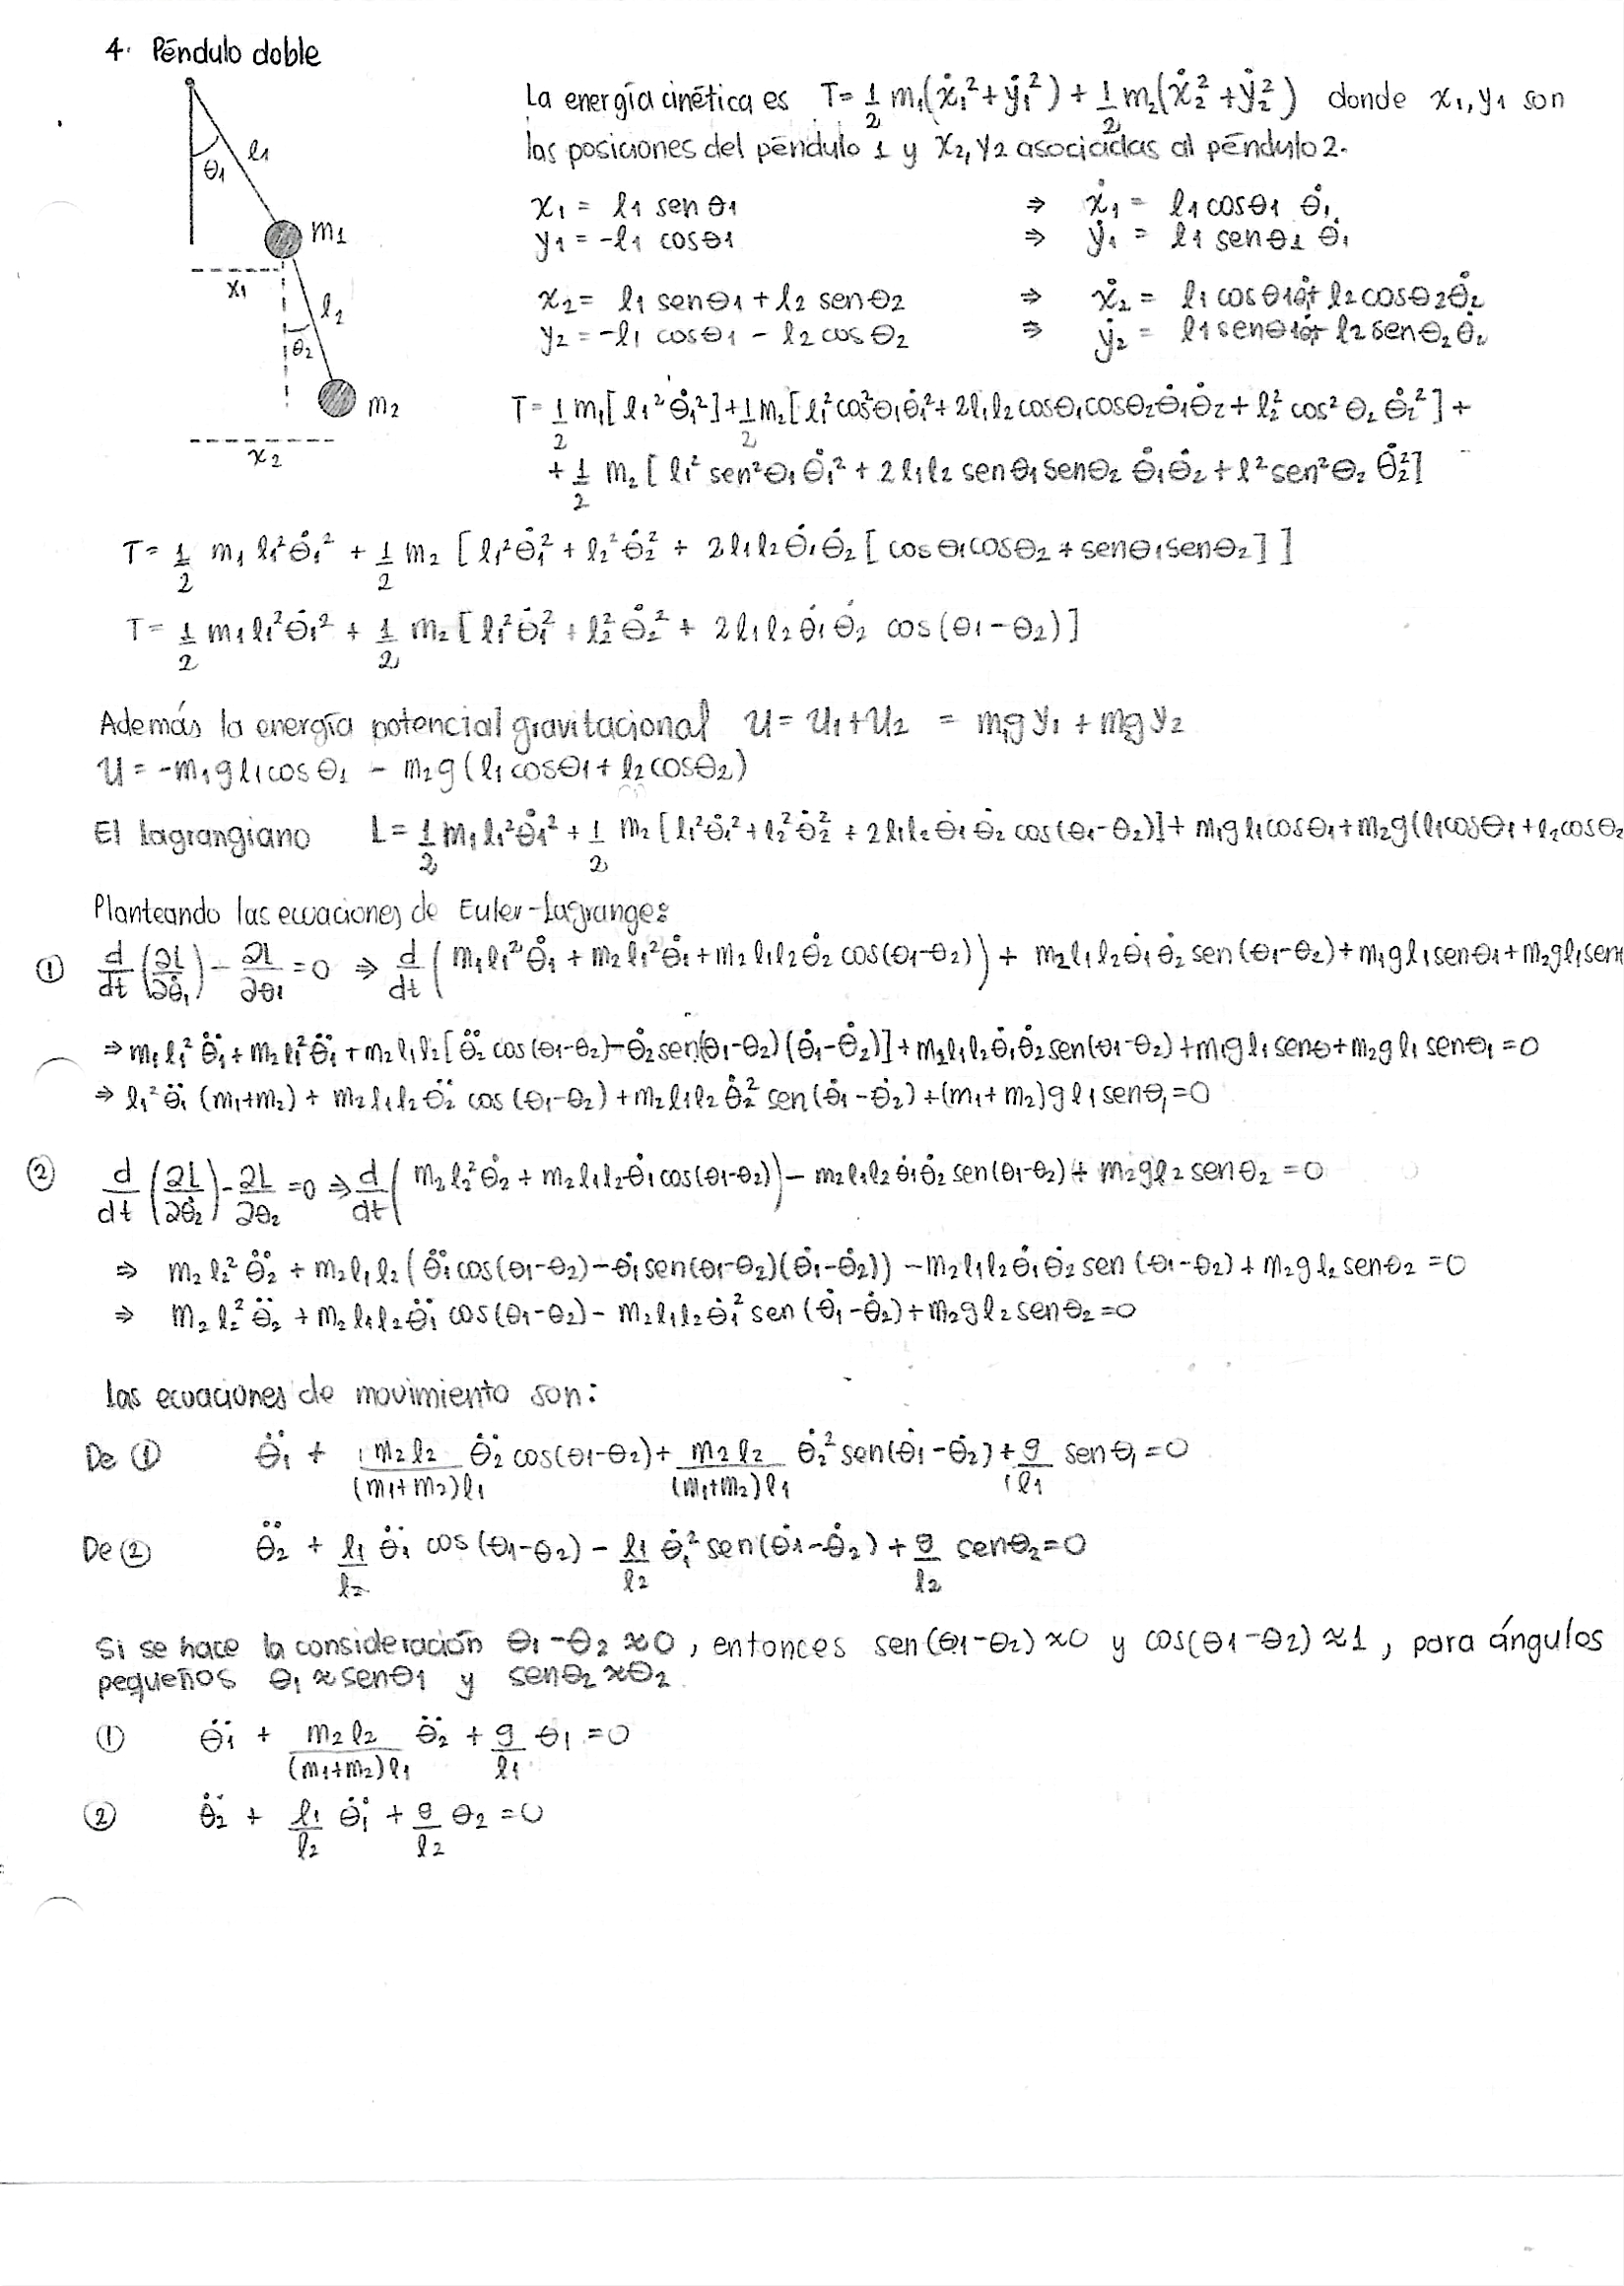

Despejemos de 2. $\ddot{\theta}_2=-\frac{l_1}{l_2}\ddot{\theta}_1-\frac{g}{l_2}\theta_2$.

Reemplazando en 1.

\begin{align}
\ddot{\theta}_1&=-\frac{m_2l_2}{(m_1+m_2)l_1}\ddot{\theta}_2-\frac{g}{l_1}\theta_1 \\
\ddot{\theta}_1&=-\frac{m_2l_2}{(m_1+m_2)l_1}(-\frac{l_1}{l_2}\ddot{\theta}_1-\frac{g}{l_2}\theta_2)-\frac{g}{l_1}\theta_1 \\
\ddot{\theta}_1&=\frac{m_2}{(m_1+m_2)}\ddot{\theta}_1+\frac{m_2g}{(m_1+m_2)l_1}\theta_2-\frac{g}{l_1}\theta_1 \\
\ddot{\theta}_1-\frac{m_2}{m_1+m_2}\ddot{\theta}_1&=\frac{m_2g}{(m_1+m_2)l_1}\theta_2-\frac{g}{l_1}\theta_1 \\
(1-\frac{m_2}{m_1+m_2})\ddot{\theta}_1&=\frac{m_2g}{(m_1+m_2)l_1}\theta_2-\frac{g}{l_1}\theta_1 \\
\ddot{\theta}_1&=(1-\frac{m_2}{m_1+m_2})^{-1}(\frac{m_2g}{(m_1+m_2)l_1}\theta_2-\frac{g}{l_1}\theta_1) \\
\end{align}

In [ ]:
#@markdown  EDO péndulo doble
m1=1; m2=1.5; l1=1; l2=2

def edm_pendulodoble(Y,t):
  M=(m1+m2)

  #variables
  theta1=Y[0]
  theta2=Y[1]
  theta1p=Y[2]
  theta2p=Y[3]

  #derivadas
  dtheta1p=(1-m2/M)**(-1)*(m2*g/(M*l1)*theta2-g/l1*theta1)
  dtheta2p=-l1/l2*dtheta1p-g/l2*theta2

  return [theta1p,theta2p,dtheta1p,dtheta2p]

In [ ]:
#@markdown Solución EDO
#Periodo de oscilación para primer péndulo
T=2*np.pi*np.sqrt(l1/g)

#Condiciones iniciales
Y=[np.radians(45),np.radians(30),0.0,0.0]    #theta1,theta2 y las velocidades respectivas en ese punto
ts=np.linspace(0,1*T,100)

#Solución numérica
solucion=odeint(edm_pendulodoble,Y,ts)

In [ ]:
#@markdown Extracción coordenadas cartesianas
#Extraemos y convertimos los ángulos al intervalo [-pi,pi]

thetas1=np.mod(solucion[:,0],2*np.pi)
thetas1[thetas1>np.pi]=thetas1[thetas1>np.pi]-2*np.pi
thetas2=np.mod(solucion[:,1],2*np.pi)
thetas2[thetas2>np.pi]=thetas2[thetas2>np.pi]-2*np.pi

#Extraemos la vlocidad angular
thetaprima1=solucion[:,2]
thetaprima2=solucion[:,3]

#En el espacio coordenado
x1=l1*np.sin(thetas1)
y1=-l1*np.cos(thetas1)
x2=l1*np.sin(thetas1)+l2*np.sin(thetas2)
y2=-l1*np.cos(thetas1)-l2*np.cos(thetas2)

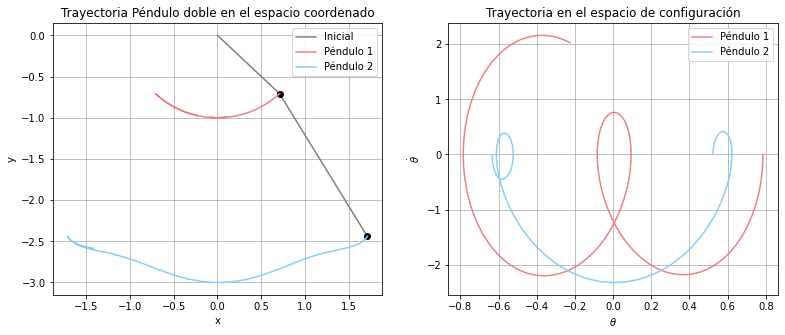

In [ ]:
#@markdown  Gráfica
fig, axs = plt.subplots(1, 2, figsize=(13,5))

axs[0].set_title("Trayectoria Péndulo doble en el espacio coordenado")
axs[0].plot([0,x1[0]],[0,y1[0]],color="gray",label="Inicial")
axs[0].plot([x1[0],x2[0]],[y1[0],y2[0]],color="gray")
axs[0].plot(x1[0],y1[0],"ko")
axs[0].plot(x2[0],y2[0],"ko")
axs[0].plot(x1,y1,color="lightcoral",label="Péndulo 1")
axs[0].plot(x2,y2,color="lightskyblue",label="Péndulo 2")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].grid()

axs[1].set_title("Trayectoria en el espacio de configuración")
axs[1].plot(thetas1,thetaprima1,color="lightcoral",label="Péndulo 1")
axs[1].plot(thetas2,thetaprima2,color="lightskyblue",label="Péndulo 2")
axs[1].set_xlabel(r"$\theta$")
axs[1].set_ylabel(r"$\dot{\theta}$")
axs[1].legend()
axs[1].grid()

In [ ]:
#@markdown Solución para dos péndulos con leves diferencia en Condiciones iniciales
#Sistema
m1=1; m2=1; l1=1; l2=1


#_________________________________
#Periodo de oscilación para primer péndulo
T=2*np.pi*np.sqrt(l1/g)
ts=np.linspace(0,1*T,1000)

#Condiciones iniciales 1
Y1=[np.radians(150),np.radians(30),13.0,13.0]    #theta1,theta2 y las velocidades respectivas en ese punto

#Solución numérica 1
solucion1=odeint(edm_pendulodoble,Y1,ts)

#Condiciones iniciales 2
Y2=[np.radians(150),np.radians(30),10.0,10.0]    #theta1,theta2 y las velocidades respectivas en ese punto

#Solución numérica 2

solucion2=odeint(edm_pendulodoble,Y2,ts)


In [ ]:
#@markdown Primer péndulo
#Extraemos y convertimos los ángulos al intervalo [-pi,pi]

thetas1=np.mod(solucion1[:,0],2*np.pi)
thetas1[thetas1>np.pi]=thetas1[thetas1>np.pi]-2*np.pi
thetas2=np.mod(solucion1[:,1],2*np.pi)
thetas2[thetas2>np.pi]=thetas2[thetas2>np.pi]-2*np.pi

#Extraemos la vlocidad angular
thetaprima1=solucion1[:,2]
thetaprima2=solucion1[:,3]

#En el espacio coordenado
x11=l1*np.sin(thetas1)
y11=-l1*np.cos(thetas1)
x21=l1*np.sin(thetas1)+l2*np.sin(thetas2)
y21=-l1*np.cos(thetas1)-l2*np.cos(thetas2)

In [ ]:
#@markdown Segundo péndulo
#Extraemos y convertimos los ángulos al intervalo [-pi,pi]

thetas1=np.mod(solucion2[:,0],2*np.pi)
thetas1[thetas1>np.pi]=thetas1[thetas1>np.pi]-2*np.pi
thetas2=np.mod(solucion2[:,1],2*np.pi)
thetas2[thetas2>np.pi]=thetas2[thetas2>np.pi]-2*np.pi

#Extraemos la vlocidad angular
thetaprima1=solucion2[:,2]
thetaprima2=solucion2[:,3]

#En el espacio coordenado
x12=l1*np.sin(thetas1)
y12=-l1*np.cos(thetas1)
x22=l1*np.sin(thetas1)+l2*np.sin(thetas2)
y22=-l1*np.cos(thetas1)-l2*np.cos(thetas2)

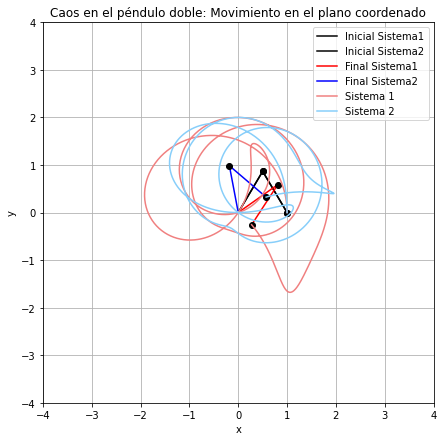

In [ ]:
#@markdown Comparación trayectoria entre péndulos dobles
plt.figure(figsize=(7,7))
plt.title("Caos en el péndulo doble: Movimiento en el plano coordenado")

plt.plot([0,x11[0]],[0,y11[0]],color="k",label="Inicial Sistema1")
plt.plot([x11[0],x21[0]],[y11[0],y21[0]],color="k")
plt.plot([0,x12[0]],[0,y12[0]],color="k",label="Inicial Sistema2")
plt.plot([x12[0],x22[0]],[y12[0],y22[0]],color="k")
plt.plot(x11[0],y11[0],"ko");plt.plot(x21[0],y21[0],"ko")
plt.plot(x12[0],y12[0],"ko");plt.plot(x22[0],y22[0],"ko")

plt.plot([0,x11[-1]],[0,y11[-1]],color="red",label="Final Sistema1")
plt.plot([x11[-1],x21[-1]],[y11[-1],y21[-1]],color="red")
plt.plot([0,x12[-1]],[0,y12[-1]],color="blue",label="Final Sistema2")
plt.plot([x12[-1],x22[-1]],[y12[-1],y22[-1]],color="blue")
plt.plot(x11[-1],y11[-1],"ko");plt.plot(x21[-1],y21[-1],"ko")
plt.plot(x12[-1],y12[-1],"ko");plt.plot(x22[-1],y22[-1],"ko")

plt.plot(x21,y21,color="lightcoral",label="Sistema 1")
plt.plot(x22,y22,color="lightskyblue",label="Sistema 2")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.legend()
plt.grid()

Se puede apreciar que el sistema es caótico, debido a que ambos sistemas parten de la misma posición, sólo se aumenta levemente la velocidad angular para el sistema dos, con lo que se evidencia la diferencia en la trayectoria que siguen ambos sistemas.

**5. Mecánica generalizada.** El término _mecánica generalizada_ se usa para designar una variación de la mecánica clásica en la que el Lagrangiano contiene derivadas temporales de $q_i$ más allá de primer orden. Problemas en los que $x = f(x,\dot{x},\ddot{x},t)$ han sido nombrados en inglés como _"jerky mechanics"_. Tales ecuaciones de movimiento tienen interesantes aplicaciones en teoría de caos (las cuales no trabajaremos).

Aplicando los métodos del cálculo de variaciones, muestre que si hay un lagrangiano de la forma $L(q_i,\dot{q}_i,\ddot{q}_i,t)$, y el principio de Hamilton permanece con la invarianza de $q_i$ y $\dot{q}_i$ en los extremos, entonces las ecuaciones de Euler-Lagrange correspondientes son:

\begin{equation}
\frac{d^2}{dt^2}\Big(\frac{\partial L}{\partial \ddot{q_i}}\Big) - \frac{d}{dt}\Big(\frac{\partial L}{\partial \dot{q_i}}\Big) + \frac{\partial L}{\partial q_i} = 0. \qquad i = 1,2,... ,n.
\end{equation}

Aplique el resultado al Lagrangiano:

\begin{equation}
L = -\frac{m}{2}q\ddot{q} - \frac{k}{2}q^2
\end{equation}

¿Reconoce las ecuaciones de movimiento encontradas?

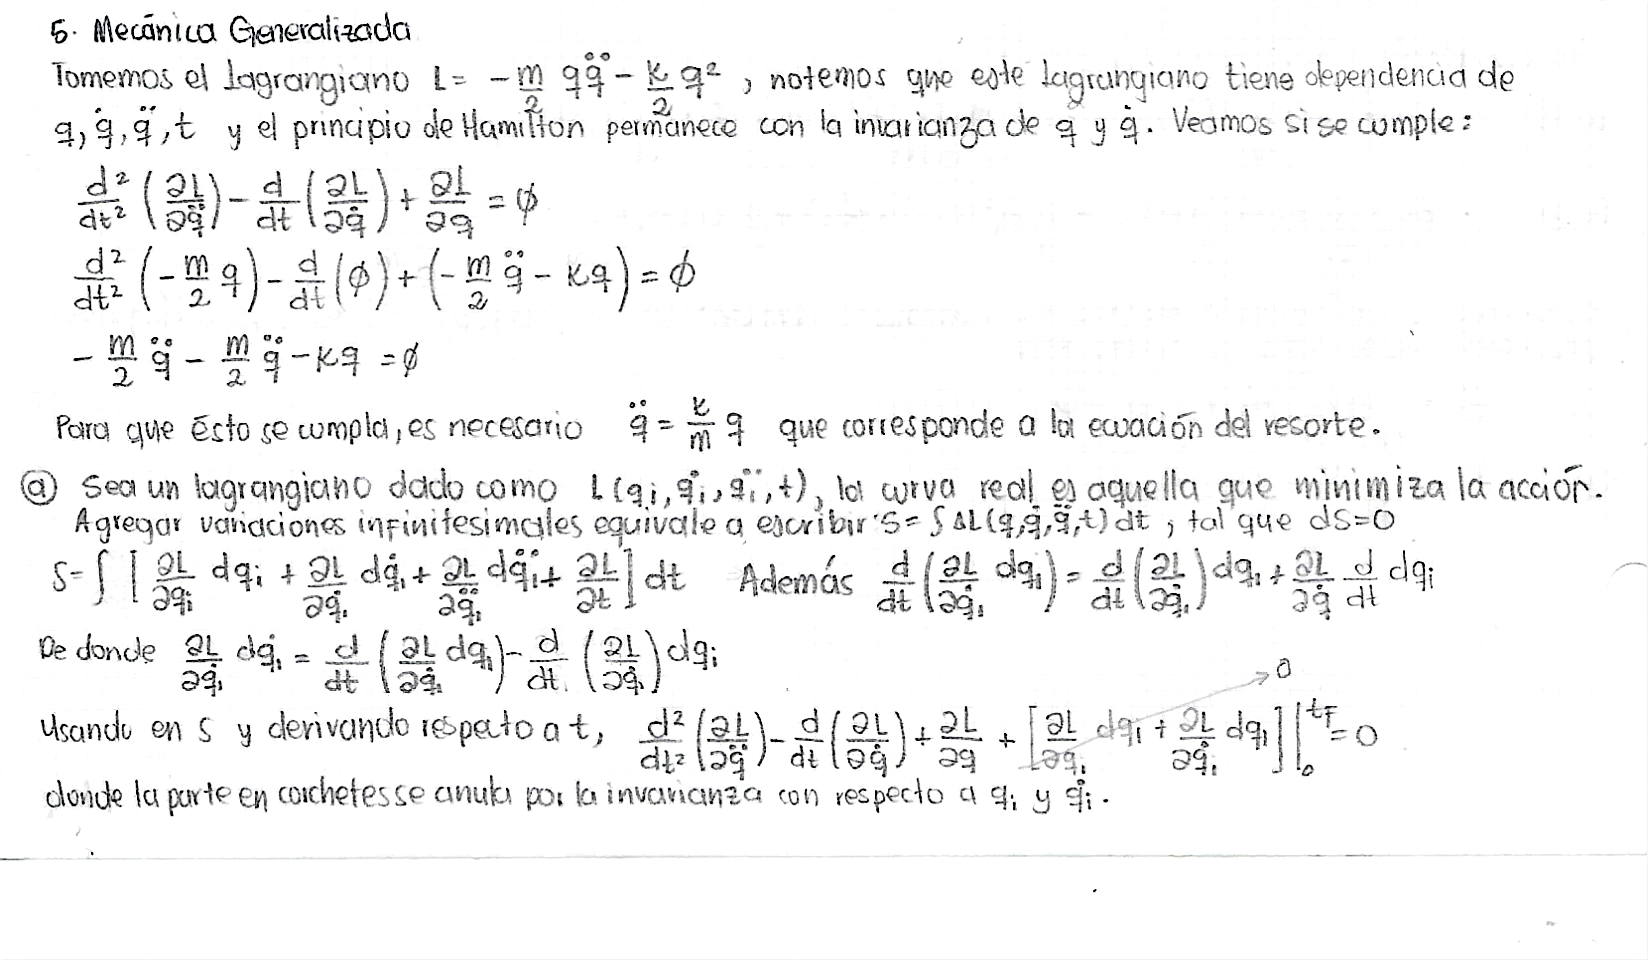

 **6. El CRTBP coplanar.** Una partícula de prueba de masa $m$ se mueve sobre el plano de Laplace de otros dos cuerpos de masas ($1 - \alpha$) y $\alpha$ las cuales son mucho mayores que $m$ y determinan su dinámica. En este caso, el Hamiltoniano se escribe como

 $$
 H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + p_x y' - p_y x' - (1-\alpha)\frac{m}{r_1} - \alpha\frac{m}{r_2}
 $$

 con $r_1 = \sqrt{(x' + \alpha)^2 + y'^2}$ y $r_2 = \sqrt{[x' - (1- \alpha)]^2 + y'^2}$ . Las variables primadas están referidas a un sistema que rota con velocidad angular constante igual a la unidad.

 Encuentre las ecuaciones Hamiltonianas de movimiento para este sistema.

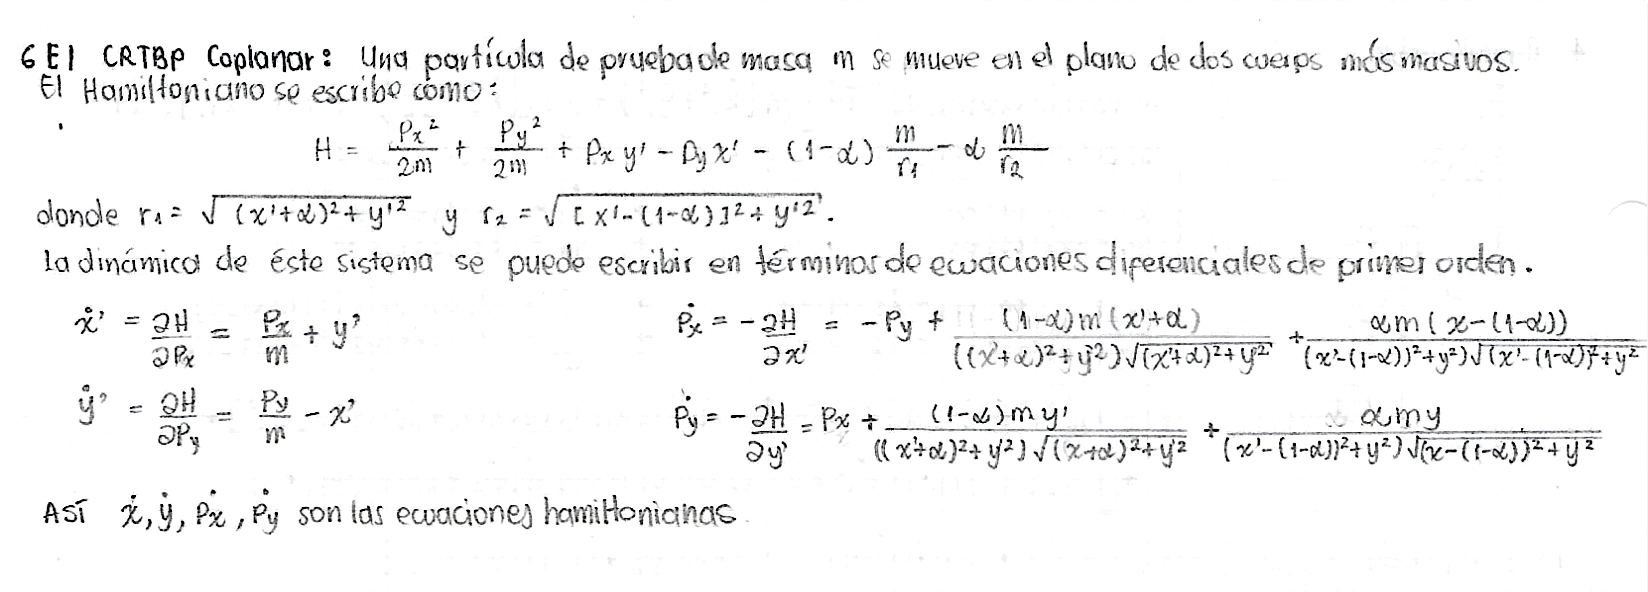

 **7. Partícula deslizándose sobre un alambre parabólico.** Una partícula de masa $m$ se desliza bajo la acción de la gravedad y sin fricción sobre un alambre con forma de parábola.

**a.** Demuestre que el Hamiltoniano de este sistema se escribe como

\begin{equation}
  H(x,p) = \frac{p^2}{2m(1+x^2)} + \frac{mg}{2}x^2
\end{equation}


**b.** Grafique e interprete los contornos de nivel para este Hamiltoniano.


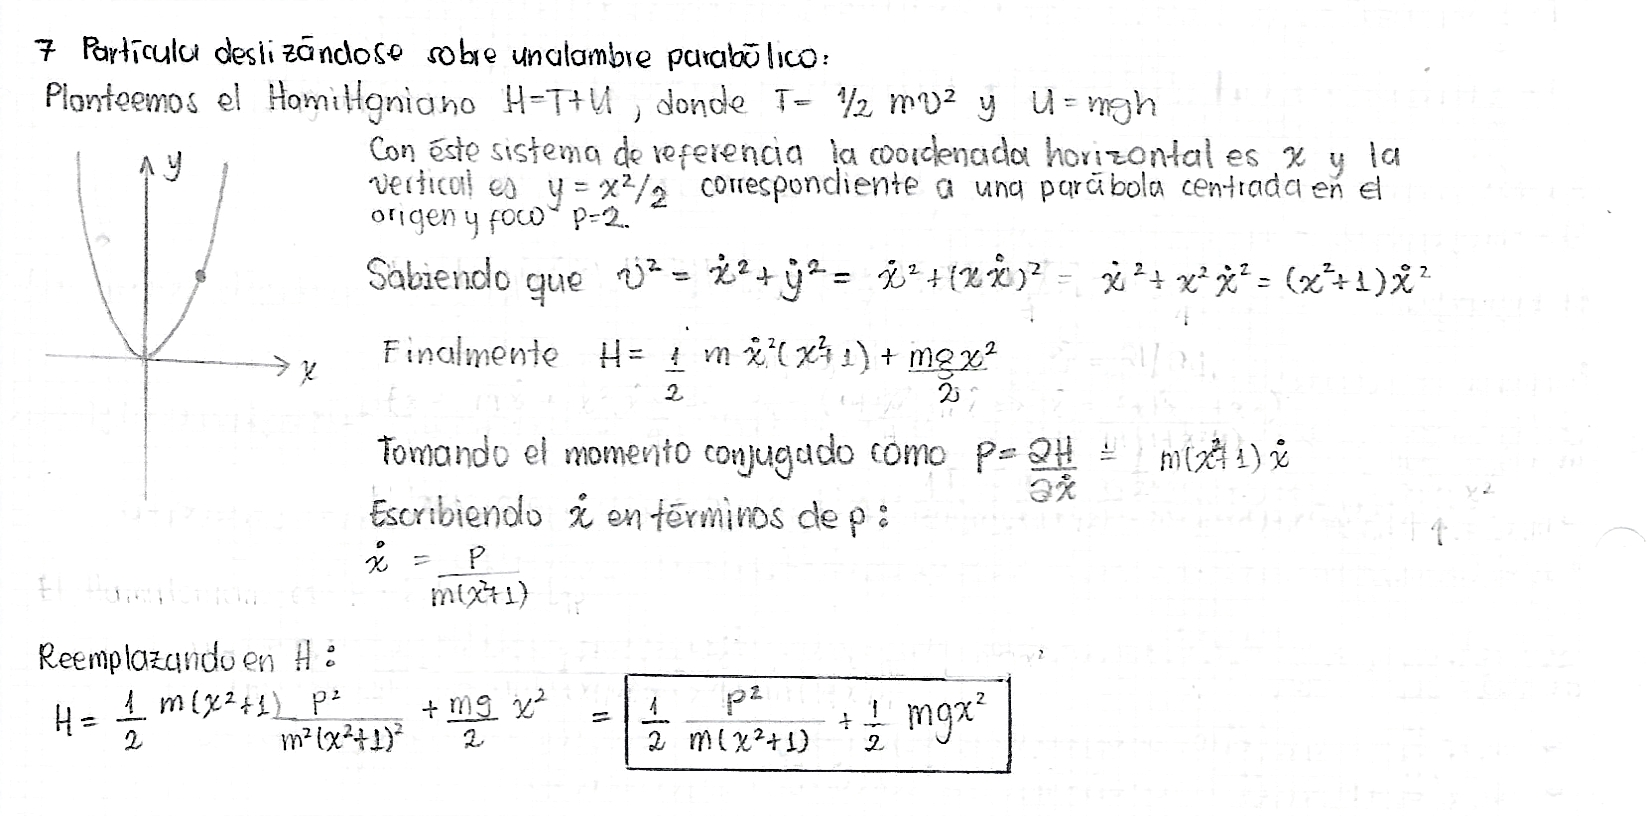

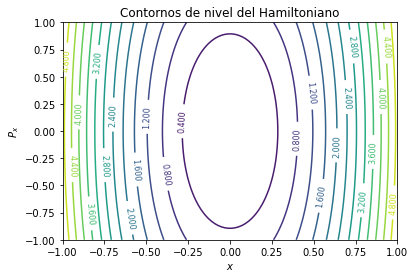

In [ ]:
#@markdown Contornos de nivel Hamiltoniano

m=1                        #masa de la partícula
g=9.81                     #gravedad

fig = plt.figure()
ax = fig.add_subplot(111)

x = px = np.linspace(-1, 1, 100)
X,Px = np.meshgrid(x,px)
H=Px**2/(2*m*(1+X**2))+m*g*(X**2)/2

cs = ax.contour(X, Px, H, 15)
ax.clabel(cs, fontsize=8)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$P_x$")
ax.set_title("Contornos de nivel del Hamiltoniano")

plt.show()

De los contornos de nivel del Hamiltoniano se sabe que la partícula se mueve sobre el espacio de fase sobre las líneas del contorno en dirección de las manecillas del reloj, en sentido perpendicular al gradiente del Hamiltoniano, así mismo del hecho de que las curvas sean cerradas, se indica que hay un movimiento armónico, de modo que esta partícula se mueve sobre la parábola similar a un péndulo.

**8. El Hamiltoniano de Hénon-Heiles.** En 1964, M. Hénon y C.Heiles estudiaban el movimiento de las estrellas alrededor del centro galáctico tratando de encontrar una tercera constante de movimiento a parte del momentum angular y la energía. Esto les llevo a proponer un potencial idealizado que restringía su acción solo al plano x, y. Este potencial se caracteriza por poseer dos términos cúbicos que involucran a las variables x, y haciendo a las ecuaciones de movimiento resultantes no lineales y acopladas. El Hamiltoniano asociado es el Hamiltoniano de Hénon-Heiles que en coordenadas cartesianas se escribe como

\begin{equation}
 H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + \frac{1}{2}(x^2+y^2) + x^2y - \frac{1}{3}y^3
\end{equation}

**a.** ¿El Hamiltoniano de Hénon-Heiles coincide con la energía?

**b.** Deduzca las ecuaciones Hamiltonianas de movimiento para una masa m sometida a este potencial. Tenga en cuenta que $p_x = m\dot{x}$ y $p_y = m\dot{y}$.

**c.** Para un par de condiciones iniciales apropiadas (fije un valor de la energía y encuentre valores de las variables generalizadas que la satisfagan) integre numéricamente las ecuaciones de movimiento usando el método de Euler y el integrador simpléctico Leap-Frog (Consultar). Grafique el comportamiento de la energía como función del tiempo ¿Es la energía una cantidad conservada con ambos esquemas?

**d.** Grafique la trayectoria en el espacio de configuración.

**e.** Grafique los contornos de nivel del potencial para distintos valores de la energía (E = $1/6$, $1/8$, $1/12$, $1/24$, $0,01$) y relacione los resultados con el inciso anterior.

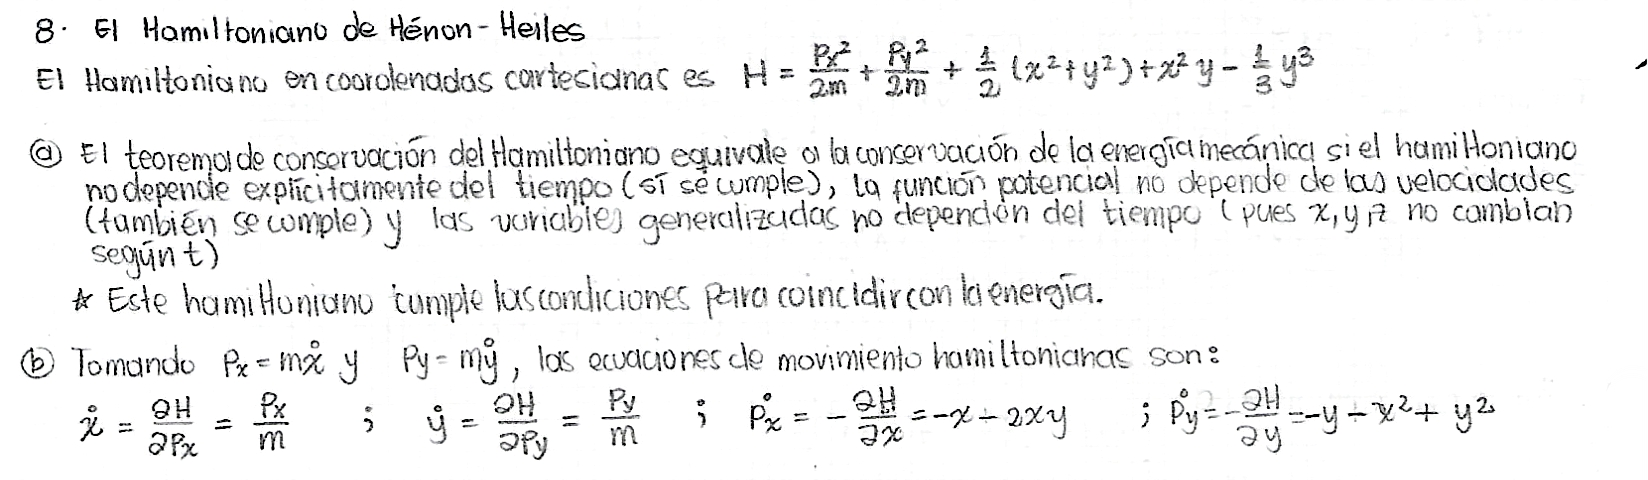

Fijemos un valor de energía para una partícula de masa $m=1$ de modo que la energía es:

\begin{equation}
H=\frac{P_x^2}{2}+\frac{P_y^2}{2}+\frac{1}{2}(x^2+y^2)+x^2y-\frac{1}{3}y^3
\end{equation}

y las ecuaciones diferenciales son:

\begin{align}
\dot{x}&=P_x \\
\dot{y}&=P_y \\
\dot{P_x}&=-x-2xy \\
\dot{P_y}&=-y-x^2+y^2
\end{align}

Planteemos una condiciones iniciales tales que $P_x,P_y,y,x=1$, con lo que la enegía toma el valor $H=\frac{8}{3}$:

\begin{equation}
H=\frac{1}{2}+\frac{1}{2}+\frac{1}{2}(1+1)+1-\frac{1}{3}=\frac{8}{3}
\end{equation}

In [ ]:
#@markdown Funciones integral
dotx=lambda t,px: px
doty=lambda t,py: py
dotpx=lambda t,x,y: -x-2*x*y
dotpy=lambda t,x,y: -y*-x**2+y**2

In [ ]:
#@markdown Función Energía

def H(x,y,px,py):
  return px**2/2+py**2/2+1/2*(x**2+y**2)+x**2*y-1/3*y**3

#__________________________________________
#Condiciones iniciales
x0=1; y0=1; px0=1; py0=1
Inicial=[x0,y0,px0,py0]

print(f"Para las condiciones iniciales propuestas, la energía toma el valor H={H(Inicial[0],Inicial[1],Inicial[2],Inicial[3]):.2f}")

Para las condiciones iniciales propuestas, la energía toma el valor H=2.67


In [ ]:
#@markdown Método Euler

h = 0.01                         # Paso
t = np.arange(0, 1 + h, h)       # tiempos

#Arreglos vacíos para guardar la solución
xs_euler=np.zeros(len(t));ys_euler=np.zeros(len(t))
pxs_euler=np.zeros(len(t));pys_euler=np.zeros(len(t))

#Condición inicial
xs_euler[0]=x0;ys_euler[0]=y0;pxs_euler[0]=px0;pys_euler[0]=py0;

#Explícitamente Método de Euler
for i in range(0, len(t) - 1):
    xs_euler[i + 1] = xs_euler[i] + h*dotx(t[i], pxs_euler[i])
    ys_euler[i + 1] = ys_euler[i] + h*doty(t[i], pys_euler[i])
    pxs_euler[i + 1] = pxs_euler[i] + h*dotpx(t[i], xs_euler[i],ys_euler[i])
    pys_euler[i + 1] = pys_euler[i] + h*dotpy(t[i], xs_euler[i],ys_euler[i])

In [ ]:
#@markdown Método Leap Frog

#Arreglos vacíos para guardar la solución
xs_leap=np.zeros(len(t));ys_leap=np.zeros(len(t))
pxs_leap=np.zeros(len(t));pys_leap=np.zeros(len(t))

#Condición inicial
xs_leap[0]=x0;ys_leap[0]=y0;pxs_leap[0]=px0;pys_leap[0]=py0;

#Primero se halla la segunda entrada con Euler
xs_leap[1]=x0 + h*dotx(t[0], px0)
ys_leap[1]=y0 + h*doty(t[0], py0)
pxs_leap[1]=px0 + h*dotpx(t[0], x0,y0)
pys_leap[1]=py0 + h*dotpy(t[0], x0,y0)


#Explícitamente Método de Leap Frog para el índice 2 en adelante
for i in range(1, len(t) - 1):
    pxs_leap[i + 1] = pxs_leap[i] + 2*h*dotpx(t[i+1], xs_leap[i+1],ys_leap[i+1])
    pys_leap[i + 1] = pys_leap[i] + 2*h*dotpy(t[i+1], xs_leap[i+1],ys_leap[i+1])
    xs_leap[i + 1] = xs_leap[i] + 2*h*dotx(t[i+1], pxs_leap[i+1])
    ys_leap[i + 1] = ys_leap[i] + 2*h*doty(t[i+1], pys_leap[i+1])

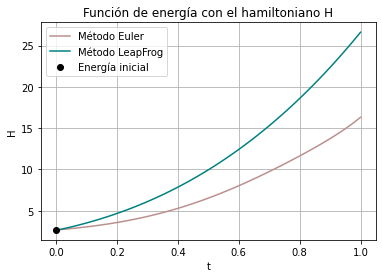

In [ ]:
#@markdown

H=np.vectorize(H)  #para pasarle los vectores x,y,px,py

plt.title("Función de energía con el hamiltoniano H")
plt.plot(t,H(xs_euler,ys_euler,pxs_euler,pys_euler),color="rosybrown",label="Método Euler")
plt.plot(t,H(xs_leap,ys_leap,pxs_leap,pys_leap),color="teal",label="Método LeapFrog")
plt.plot(ts[0],H(x0,y0,px0,py0),"o",color="black",label="Energía inicial")
plt.xlabel("t")
plt.ylabel("H")
plt.legend()
plt.grid()

Podemos observar que en ambos casos no hay conservación de la energía, ésto se debe principalmente a que tales métodos simplécticos buscan aproximar la solución a las ecuaciones diferenciales por medio del paso anterior, de modo que hay una propagación de errores según el paso anterior, que hace que la energía aumente, así el sistema físico deba tener energía constante.

In [ ]:
#@markdown Resolviendo las ecuaciones por odeint

def edm_HenonHeiles(Y,t):
  x=Y[0]
  y=Y[1]
  px=Y[2]
  py=Y[3]

  dot_x=px
  dot_y=py
  dot_px=-x-2*x*y
  dot_py=-y-x**2+y**2

  return [dot_x,dot_y,dot_px,dot_py]


#__________________________________________

Inicial=[x0,y0,px0,py0]                   #Condiciones iniciales
ts=np.linspace(0,1,len(t))                #Tiempos

solucion=odeint(edm_HenonHeiles,Inicial,ts)
xs=solucion[:,0];ys=solucion[:,1];pxs=solucion[:,2];pys=solucion[:,3]



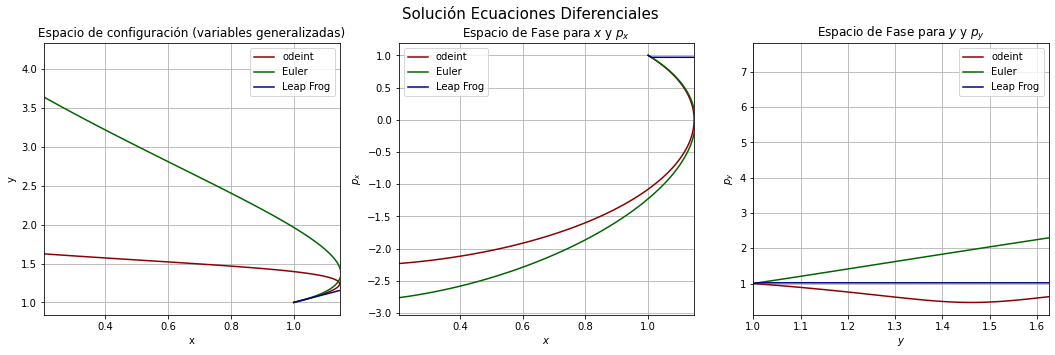

In [ ]:
#@markdown  Gráfica
fig, axs = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle("Solución Ecuaciones Diferenciales",fontsize=15)

axs[0].set_title("Espacio de configuración (variables generalizadas)")
axs[0].plot(xs,ys,color="darkred",label="odeint")
axs[0].plot(xs_euler,ys_euler,color="darkgreen",label="Euler")
axs[0].plot(xs_leap,ys_leap,color="darkblue",label="Leap Frog")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_xlim(min(xs),max(xs))
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Espacio de Fase para $x$ y $p_x$")
axs[1].plot(xs,pxs,color="darkred",label="odeint")
axs[1].plot(xs_euler,pxs_euler,color="darkgreen",label="Euler")
axs[1].plot(xs_leap,pxs_leap,color="darkblue",label="Leap Frog")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$p_x$")
axs[1].set_xlim(min(xs),max(xs))
axs[1].legend()
axs[1].grid()

axs[2].set_title(r"Espacio de Fase para $y$ y $p_y$")
axs[2].plot(ys,pys,color="darkred",label="odeint")
axs[2].plot(ys_euler,pys_euler,color="darkgreen",label="Euler")
axs[2].plot(ys_leap,pys_leap,color="darkblue",label="Leap Frog")
axs[2].set_xlabel(r"$y$")
axs[2].set_ylabel(r"$p_y$")
axs[2].set_xlim(min(ys),max(ys))
axs[2].legend()
axs[2].grid()

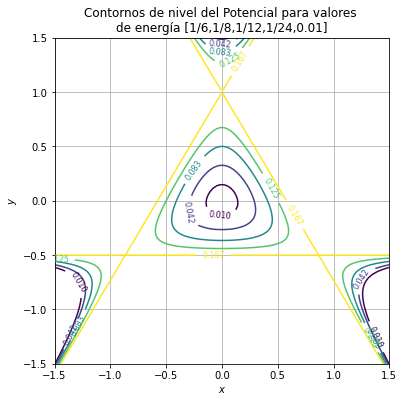

In [ ]:
#@markdown Contornos de nivel potencial
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = y = np.linspace(-1.5, 1.5, 100)
X,Y = np.meshgrid(x,y)
U=1/2*(X**2+Y**2)+X**2*Y-1/3*Y**3

cs = ax.contour(X, Y, U, np.sort([1/6,1/8,1/12,1/24,0.01]))
ax.clabel(cs, fontsize=8)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("""Contornos de nivel del Potencial para valores
de energía [1/6,1/8,1/12,1/24,0.01]""")
ax.grid()
plt.show()